In [4]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(pipeline)
plot.prepare_for_plots()

<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

In [5]:
# NB: тут два обучения с нуля, отличающиеся только количеством эпох

# From scratch: full training

In [3]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_student_model()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_student_learning_rate)
    
    for epoch in range(consts.full_student_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/scratch_full_{i}.pt')

Model 10
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Validation accuracy: 39.9%, Validation loss: 1.631563 

Epoch 2
-------------------------------


Validation accuracy: 41.7%, Validation loss: 1.550075 

Epoch 3
-------------------------------


Validation accuracy: 51.2%, Validation loss: 1.447871 

Epoch 4
-------------------------------


Validation accuracy: 51.9%, Validation loss: 1.332172 

Epoch 5
-------------------------------


Validation accuracy: 52.2%, Validation loss: 1.294894 

Epoch 6
-------------------------------


Validation accuracy: 52.2%, Validation loss: 1.277572 

Epoch 7
-------------------------------


Validation accuracy: 52.5%, Validation loss: 1.267134 

Epoch 8
-------------------------------


Validation accuracy: 52.6%, Validation loss: 1.258076 

Epoch 9
-------------------------------


Validation accuracy: 52.7%, Validation loss: 1.251425 

Epoch 10
-------------------------------


Validation accuracy: 52.8%, Validation loss: 1.246610 

Epoch 11
-------------------------------


Validation accuracy: 52.9%, Validation loss: 1.242189 

Epoch 12
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.238273 

Epoch 13
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.234518 

Epoch 14
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.231407 

Epoch 15
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.229533 

Epoch 16
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.226830 

Epoch 17
-------------------------------


Validation accuracy: 53.0%, Validation loss: 1.224441 

Epoch 18
-------------------------------


Validation accuracy: 53.1%, Validation loss: 1.221417 

Epoch 19
-------------------------------


Validation accuracy: 53.2%, Validation loss: 1.219406 

Epoch 20
-------------------------------


Validation accuracy: 53.2%, Validation loss: 1.216999 

Epoch 21
-------------------------------


Validation accuracy: 53.3%, Validation loss: 1.215089 

Epoch 22
-------------------------------


Validation accuracy: 53.4%, Validation loss: 1.212755 

Epoch 23
-------------------------------


Validation accuracy: 53.5%, Validation loss: 1.211154 

Epoch 24
-------------------------------


Validation accuracy: 53.5%, Validation loss: 1.209603 

Epoch 25
-------------------------------


Validation accuracy: 53.5%, Validation loss: 1.208039 

Epoch 26
-------------------------------


Validation accuracy: 53.5%, Validation loss: 1.206389 

Epoch 27
-------------------------------


Validation accuracy: 53.5%, Validation loss: 1.205114 

Epoch 28
-------------------------------


Validation accuracy: 53.5%, Validation loss: 1.203776 

Epoch 29
-------------------------------


Validation accuracy: 53.6%, Validation loss: 1.202193 

Epoch 30
-------------------------------


Validation accuracy: 53.6%, Validation loss: 1.200859 

Epoch 31
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.200071 

Epoch 32
-------------------------------


Validation accuracy: 53.7%, Validation loss: 1.199498 

Epoch 33
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.198454 

Epoch 34
-------------------------------


Validation accuracy: 53.7%, Validation loss: 1.197769 

Epoch 35
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.196923 

Epoch 36
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.195988 

Epoch 37
-------------------------------


Validation accuracy: 53.9%, Validation loss: 1.195651 

Epoch 38
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.194934 

Epoch 39
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.194580 

Epoch 40
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.194298 

Epoch 41
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.194176 

Epoch 42
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.193701 

Epoch 43
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.193216 

Epoch 44
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.192633 

Epoch 45
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.192331 

Epoch 46
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.191536 

Epoch 47
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.191322 

Epoch 48
-------------------------------


Validation accuracy: 53.8%, Validation loss: 1.191529 

Epoch 49
-------------------------------


Validation accuracy: 53.9%, Validation loss: 1.191272 

Epoch 50
-------------------------------


Validation accuracy: 53.9%, Validation loss: 1.190931 



FSGM Accuracy [0.5387, 0.522, 0.5041, 0.4844, 0.4602, 0.436, 0.4088, 0.3814, 0.3527, 0.3247]


Noise Accuracy [0.5387, 0.5294, 0.5238, 0.4969, 0.4742, 0.4313, 0.3949, 0.3416, 0.2929, 0.2843]


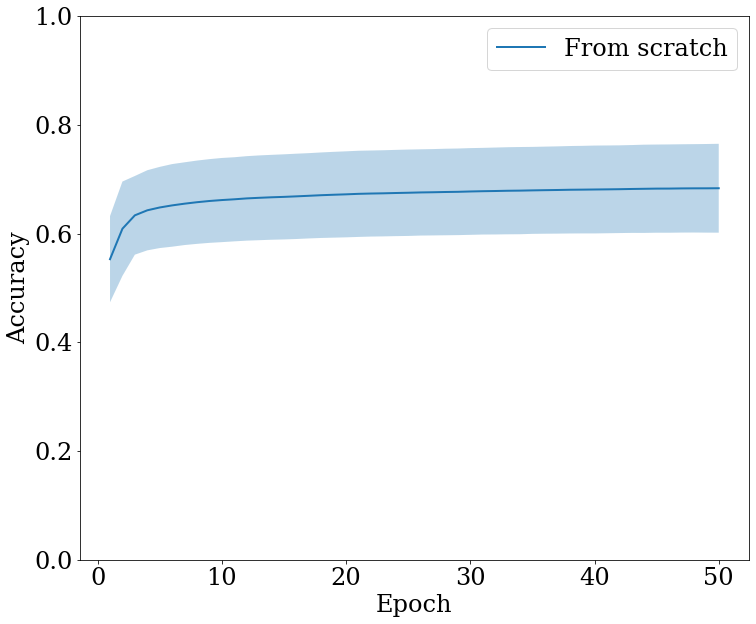

In [4]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.full_student_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

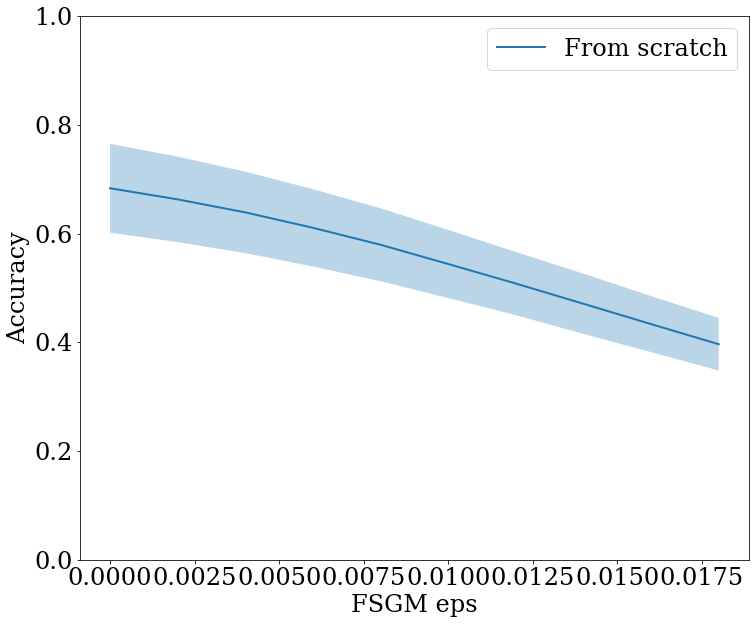

In [5]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

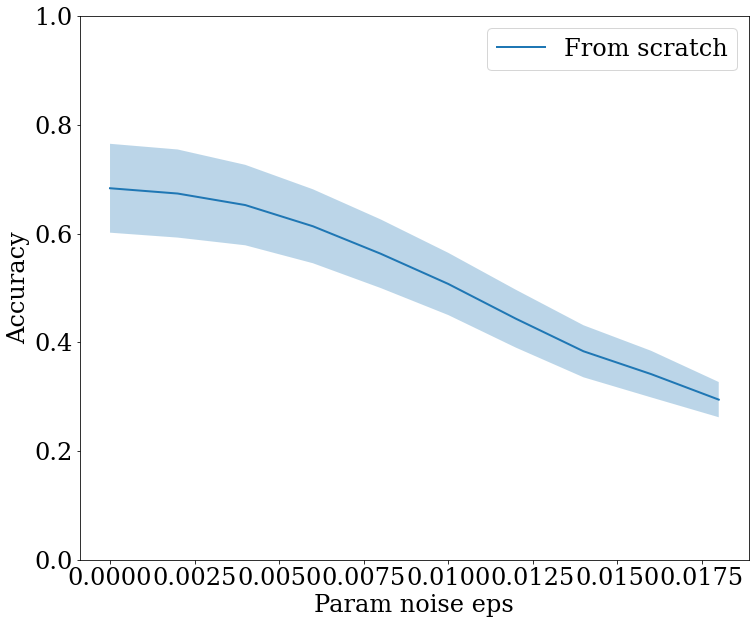

In [6]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [7]:
with open(pipeline.get_path()+'/history_full_scratch.json', 'w') as out:
    out.write(json.dumps(history))

# From scratch: 5-classes-like training

In [ ]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_student_model()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/scratch_5_{i}.pt')

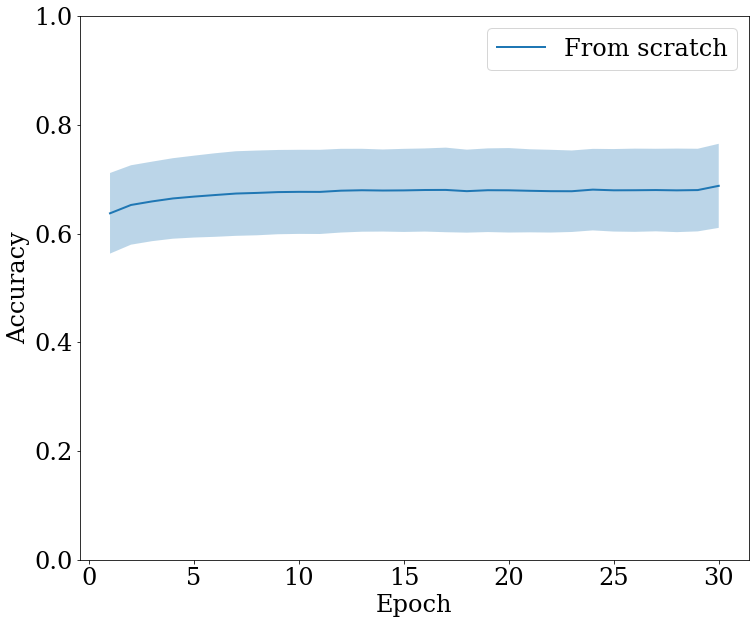

In [5]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

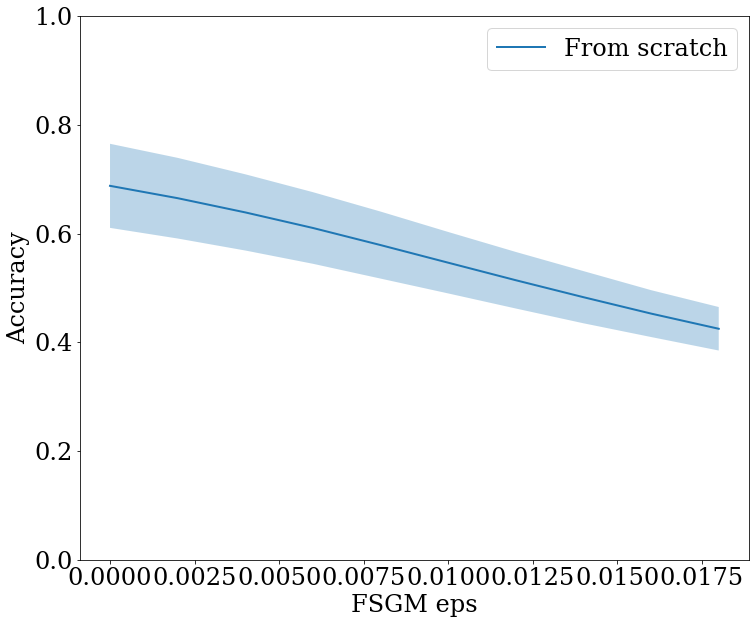

In [6]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

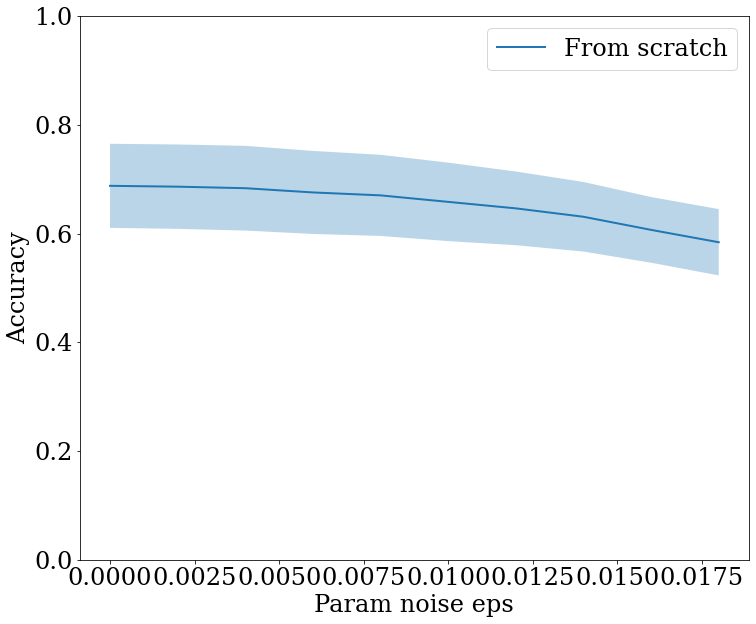

In [7]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [12]:
with open(pipeline.get_path()+'/history_5_scratch.json', 'w') as out:
    out.write(json.dumps(history))